In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import random

In [2]:
import gillespy2
from gillespy2.basic_root_solver import BasicRootSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

In [7]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.000017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.005)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.001)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=100)
            B = gillespy2.Species(name='B', initial_value=100)
            C = gillespy2.Species(name='C', initial_value=100)
            D = gillespy2.Species(name='D', initial_value=100)
            #DET = gillespy2.Species(name='DET', initial_value=1) #Create a deterministic species
            #Deterministic species will be a regular species, but with "deterministic" flag
            DET = gillespy2.Species(name='DET', initial_value=0, continuous=True)
            self.add_species([A, B, C, D, DET])
            
            #rate_rules
            rate_rule1 = gillespy2.RateRule(name='rate_rule1', expression="sin(t)", species=DET)
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            r4 = gillespy2.Reaction(name="r4", reactants={C:1}, products={D:1}, propensity_function="rate2*A*DET/vol")
            #r4 uses a deterministic species result as an argument
            self.add_reaction([r1,r2,r3, r4])
            self.timespan(numpy.linspace(0,100,1001))

In [8]:
model = MichaelisMenten()

In [9]:
%time results = model.run(solver=BasicTauHybridSolver(), show_labels=True)
#print(results)

CPU times: user 656 ms, sys: 93.8 ms, total: 750 ms
Wall time: 669 ms


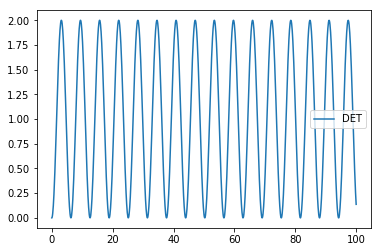

In [10]:
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

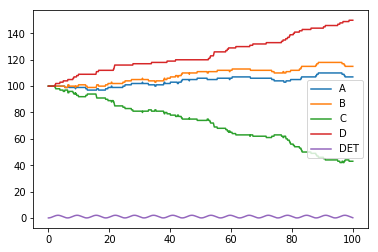

In [11]:
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

In [12]:
%time results_SSA = model.run(solver=BasicSSASolver(), show_labels=True)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 8.71 ms


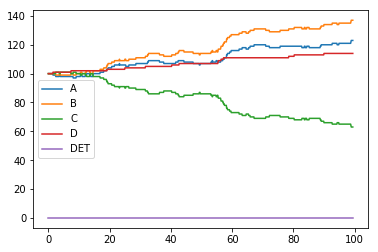

In [13]:
plt.plot(results_SSA['time'], results_SSA['A'], label='A')
plt.plot(results_SSA['time'], results_SSA['B'], label='B')
plt.plot(results_SSA['time'], results_SSA['C'], label='C')
plt.plot(results_SSA['time'], results_SSA['D'], label='D')
plt.plot(results_SSA['time'], results_SSA['DET'], label='DET')
plt.legend(loc='best')

In [14]:
#results = model.run(solver=BasicRootSolver(), show_labels=True)

In [15]:
# plt.plot(results['time'], results['A'], label='A')
# plt.plot(results['time'], results['B'], label='B')
# plt.plot(results['time'], results['C'], label='C')
# plt.plot(results['time'], results['D'], label='D')
# plt.plot(results['time'], results['DET'], label='DET')
# plt.legend(loc='best')

In [16]:
# print(results)

In [17]:
numpy.linspace(0,100,1001)

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [18]:
results['DET']

[0,
 0.00499583481175721,
 0.019933423266665168,
 0.04466351674746809,
 0.07893902041955478,
 0.12241746208382966,
 0.1746644385337057,
 0.23515793325171597,
 0.3032935151667325,
 0.3783903991234338,
 0.4596982606188276,
 0.5464047133675451,
 0.637643426053359,
 0.732502778723386,
 0.8300349709787502,
 0.9292654867479985,
 1.0292026110147747,
 1.1288457820458453,
 1.2272016531308991,
 1.3232872801309574,
 1.416142580185629,
 1.5048397563387188,
 1.5884918694990733,
 1.6662644588125906,
 1.7373788046044212,
 1.8011262079406578,
 1.8568687751099129,
 1.904049532281727,
 1.9421970548656529,
 1.9709301842939884,
 1.989961867415992,
 1.9991024749264057,
 1.998260574290757,
 1.987444199099577,
 1.9667614412062675,
 1.9364186770308425,
 1.8967191327387405,
 1.8480594811867481,
 1.79092558048068,
 1.7258889486582876,
 1.6535990739407156,
 1.5747782479614094,
 1.4902140176456837,
 1.400751315662432,
 1.3072840199942335,
 1.210746021588581,
 1.1121018961046454,
 1.0123372836050275,
 0.9124507724

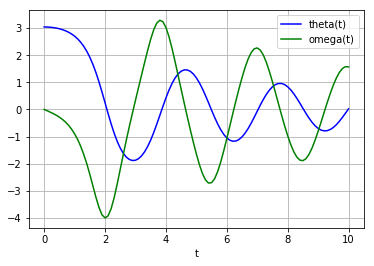

d [1]


In [19]:
def pend(y, t, b, c, d):
    theta, omega = y
    dydt = [omega, -b*omega - c*numpy.sin(theta)]
    d[0] = 1
    return dydt
d = [0]
b = 0.25
c = 5.0
y0 = [numpy.pi - 0.1, 0.0]
t = numpy.linspace(0, 10, 101)

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c, d))

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
print('d',d)

In [20]:
sol.shape

(101, 2)